In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import gc

In [2]:
#Import dataframe
path=r'C:\Users\Alex\Instacart Basket Analysis'

In [3]:
df_final=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_subset_sample.pkl'))

In [4]:
df_final.head()

,gender,state,age,number_of_dependants,marital_status,income,order_number,orders_day_of_week,order_time_of_day,department_id,...,spending_flag,frequency_flag,department,age_group,income_group,dependants_group,customer_profile,customer_income_profile,time_period,day
0,Female,Missouri,48,3,married,165665,5,1,9,7,...,High spender,Regular customer,beverages,Middle Aged Adult,Upper Income,Parent,Married Parent,Upper income married older parent,Between 8am to 5pm,Sunday
6,Female,Missouri,48,3,married,165665,6,1,8,16,...,High spender,Regular customer,dairy eggs,Middle Aged Adult,Upper Income,Parent,Married Parent,Upper income married older parent,NaN,Sunday
10,Female,Rhode Island,76,2,married,126006,5,1,9,7,...,High spender,Regular customer,beverages,Old Adult,Middle Income,Parent,Married Parent,Middle income married older parent,Between 8am to 5pm,Sunday
13,Female,Rhode Island,76,2,married,126006,2,2,9,16,...,High spender,Regular customer,dairy eggs,Old Adult,Middle Income,Parent,Married Parent,Middle income married older parent,Between 8am to 5pm,Monday
17,Female,Rhode Island,76,2,married,126006,7,5,15,16,...,High spender,Regular customer,dairy eggs,Old Adult,Middle Income,Parent,Married Parent,Middle income married older parent,Between 8am to 5pm,Thursday


In [5]:
df_final.shape

(939357, 26)

# Create a customer profile bar chart

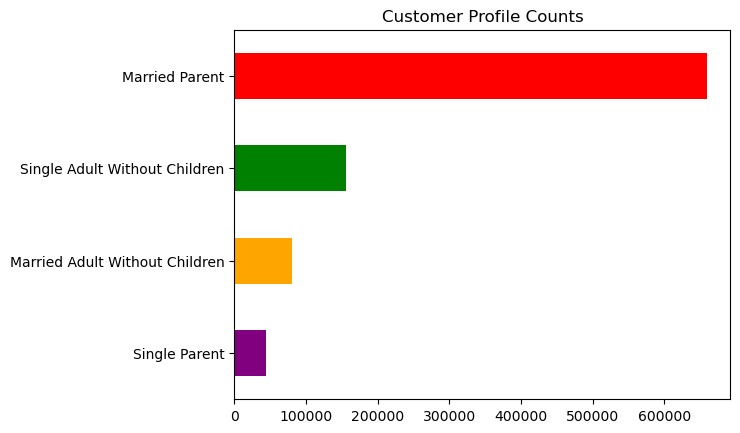

In [6]:
bar=df_final['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color=['purple', 'orange', 'green', 'red','blue'], title='Customer Profile Counts')

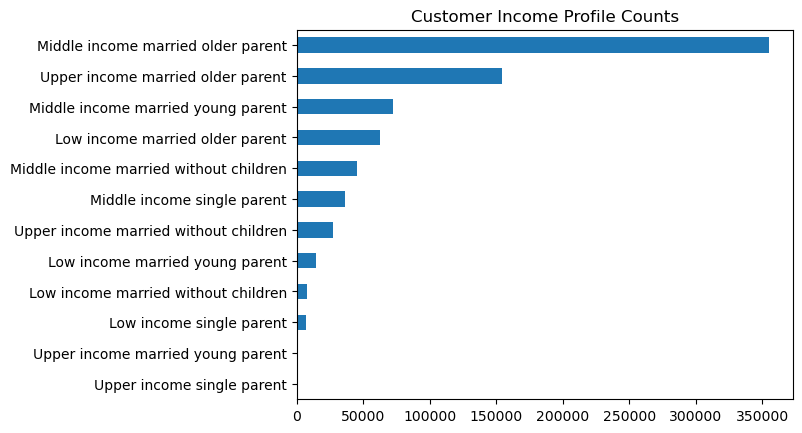

In [7]:
bar_cust_inc_prof=df_final['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(title='Customer Income Profile Counts')

Conclusion: Married older parent shops the most

# Aggregate variables on customer-profile level for usage frequency and expenditure

In [8]:
df_final.groupby('customer_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                                  min      mean   max
customer_profile                                     
Married Adult Without Children    1.0  7.845942  14.8
Married Parent                    1.0  7.820680  14.8
Single Adult Without Children     1.0  7.829603  14.8
Single Parent                     1.0  7.777682  14.8

In [9]:
crosstab=pd.crosstab(df_final['order_number'], df_final['customer_profile'], dropna=False)

In [10]:
crosstab.head()

customer_profile,Married Adult Without Children,Married Parent,Single Adult Without Children,Single Parent
order_number,,,,
1,4449,37159,8773,2527
2,4379,35685,8230,2314
3,4282,35578,8173,2342
4,4017,32342,7530,2101
5,3780,30957,7335,2080


In [11]:
crosstab.shape

(99, 4)

In [12]:
grouped=df_final.groupby('customer_profile').agg({'order_number':['sum']})

In [13]:
grouped.head()

,order_number
,sum
customer_profile,
Married Adult Without Children,1554156
Married Parent,12501549
Single Adult Without Children,2989736
Single Parent,832934


In [14]:
df_final.groupby('customer_income_profile').agg({'prices':['min','mean', 'max']})

prices                
                                          min      mean   max
customer_income_profile                                      
Low income married older parent           1.0  7.640358  14.8
Low income married without children       1.0  7.641687  14.8
Low income married young parent           1.0  7.683717  14.8
Low income single parent                  1.0  7.647870  14.8
Middle income married older parent        1.0  7.830548  14.8
Middle income married without children    1.0  7.882976  14.8
Middle income married young parent        1.0  7.846303  14.8
Middle income single parent               1.0  7.797703  14.8
Upper income married older parent         1.0  7.871337  14.8
Upper income married without children     1.0  7.841036  14.8
Upper income married young parent         1.3  7.926050  14.8
Upper income single parent                1.3  8.460984  14.8

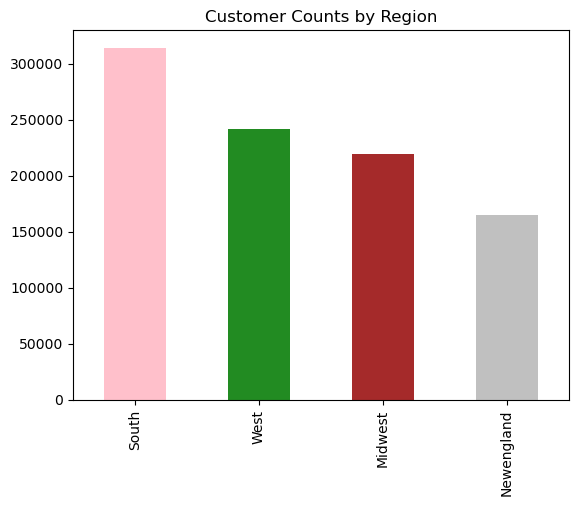

In [15]:
bar_region=df_final['region'].value_counts().plot.bar(title='Customer Counts by Region', color=['pink', 'forestgreen', 'brown', 'silver'])

In [16]:
#Customer profile and region crosstab
crosstab_profile_region=pd.crosstab(df_final['customer_profile'], df_final['region'], dropna=False)

In [17]:
crosstab_profile_region

region,Midwest,Newengland,South,West
customer_profile,,,,
Married Adult Without Children,18205,15184,26632,20624
Married Parent,154382,115472,220042,169298
Single Adult Without Children,36071,26963,52426,39883
Single Parent,10294,7443,15011,11427


In [18]:
#Customer income and region crosstab
crosstab_inc_profile_region=pd.crosstab(df_final['customer_income_profile'], df_final['region'], dropna=False)

In [19]:
crosstab_inc_profile_region

region,Midwest,Newengland,South,West
customer_income_profile,,,,
Low income married older parent,14304,11349,20727,16128
Low income married without children,1562,1400,2529,2142
Low income married young parent,3236,2560,4996,3610
Low income single parent,1718,1123,2465,1947
Middle income married older parent,82878,61933,119234,90878
Middle income married without children,10297,8585,15221,11609
Middle income married young parent,17479,12251,23551,18960
Middle income single parent,8500,6316,12399,9402
Upper income married older parent,36346,27277,51329,39573


Middle income married older parent has the highest frequency. 